Nel file csv allegato sono riportate le variazioni percentuali giornaliere dei prezzi di alcune azioni, per esempio 5% corrisponde a 0.05.
La prima colonna è la data, quelle successive sono le  variazioni percentuali giornaliere dei prezzi dell'azione corrispondente. I nomi colonna sono del tipo: TICKER% dove TICKER è il ticker dell'azione. Il ticker può essere associato alla azienda tramite motori di ricerca  come questo: https://it.investing.com

Caricare i dati in opportuni array numpy e:
- calcolare il numero di giorni in cui Alphabet va meglio di Tesla
- calcolare i massimi locali nella percentuale giornaliera di Meta Platforms
- calcolare se per Microsoft Corporation i giorni positivi sono più di quelli negativi
- calcolare quanti sono i giorni in cui Microsoft Corporation è positiva e Apple è negativa
- stampare in quali date la somma delle variazioni di prezzo di Tesla e Apple è maggiore di 0
- trovare se ci sono periodi di 3 giorni consecutivi in cui Amazon.com è negativa e in caso affermativo in che date iniziano
- fare un grafico che rappresenti l'andamento delle  variazioni percentuali giornaliere  di Amazon.com
- fare un istogramma che rappresenti le  variazioni percentuali giornaliere  di Tesla.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def estrazione_dati(nome_file, skip_header, skip_footer, usecols, delimiter, missing_value=""):
    dati = {}
    for chiave, valore in usecols.items():
        dati[chiave] = np.array([], dtype=eval(valore))
        
    with open(nome_file, "r") as file:
        contenuto = file.readlines()
        if skip_footer == 0: contenuto = contenuto[skip_header:]
        else: contenuto = contenuto[skip_header:-skip_footer]
            
        for riga in contenuto:
            dati_riga = riga[:-1].replace(" ", "").split(delimiter)
            
            if "" in dati_riga and missing_value=="":
                pass
            else:
                for chiave, valore in usecols.items():
                    if dati_riga[chiave] != "":
                        dati[chiave] = np.append(dati[chiave], eval(valore)(dati_riga[chiave]))
                    else:
                        if missing_value != "":
                            dati[chiave] = np.append(dati[chiave], eval(valore)(missing_value))
    return dati

In [4]:
dati_azioni = estrazione_dati("./dati_azioni.csv", 1, 0, {0:'str', 1:'float', 2:'float', 3:'float', 4:'float', 5:'float', 6:'float'}, ",", "")
dati_azioni

{0: array(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
        '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
        '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
        '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
        '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
        '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06',
        '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12',
        '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
        '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
        '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
        '2018-03-02', '2018-03-05', '2018-03-06', '2018-03-07',
        '2018-03-08', '2018-03-09', '2018-03-12', '2018-03-13',
        '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
        '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
        '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
        '2018-04-02', '2018-04-03', '

In [5]:
# ESERCIZIO 1

numero_di_giorni_in_cui_Alphabet_va_meglio_di_tesla = np.count_nonzero(dati_azioni[3] > dati_azioni[6])
numero_di_giorni_in_cui_Alphabet_va_meglio_di_tesla

489

In [6]:
# ESERCIZIO 2

array = dati_azioni[5][1:-1]
array_giorno_precedente = np.roll(dati_azioni[5], 1)[1:-1]
array_giorno_dopo = np.roll(dati_azioni[5], -1)[1:-1]

indici_bool_massimi_locali_meta_platforms = np.logical_and(array > array_giorno_dopo, array > array_giorno_precedente)
numero_massimi_locali_meta_platforms = np.count_nonzero(indici_bool_massimi_locali_meta_platforms)
massimi_locali_meta_platforms = array[indici_bool_massimi_locali_meta_platforms]

massimi_locali_meta_platforms

array([ 1.36711563e-02, -1.59678395e-04,  1.23873698e-02,  2.25053891e-02,
        1.34414568e-02,  6.12968822e-03,  3.31745785e-02,  2.23436123e-02,
        2.64016711e-02,  3.67889726e-02,  1.07948936e-02,  2.40236195e-02,
        2.14018734e-02,  2.18600955e-02,  1.58495089e-02,  1.27006680e-02,
        6.68984947e-03,  7.37440106e-03,  4.20351447e-03,  4.41743094e-02,
        4.63351067e-03,  2.73371378e-02,  4.50199515e-02,  3.96661484e-03,
        2.32360722e-02,  1.04592780e-02, -2.64615374e-03,  9.06130691e-02,
        1.27114155e-02,  1.48833253e-02,  2.09032279e-02,  3.05675528e-03,
        9.90810647e-03,  1.68661088e-02,  2.19001473e-02, -1.75908702e-03,
        1.29031576e-02,  2.28678022e-02,  1.25605891e-02,  2.28365709e-02,
        1.19109426e-03,  1.34962761e-02,  1.99141849e-03,  1.56442629e-02,
        2.96788323e-02,  2.16253828e-02,  1.33185824e-02,  8.89041346e-03,
        1.78274830e-02, -7.77258119e-03,  8.88579618e-03,  2.74978234e-02,
        4.44932147e-02,  

In [7]:
# ESERCIZIO 3

per_microsoft_i_giorni_positivi_sono_piu_di_quelli_negativi = np.count_nonzero(dati_azioni[2] > 0) > np.count_nonzero(dati_azioni[2] < 0)
per_microsoft_i_giorni_positivi_sono_piu_di_quelli_negativi

True

In [8]:
# ESERCIZIO 4

microsoft_positiva_apple_negativa = np.count_nonzero(np.logical_and(dati_azioni[2] > 0, dati_azioni[1] < 0))
microsoft_positiva_apple_negativa

129

In [9]:
# ESERCIZIO 5

indici_bool_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero = dati_azioni[1] + dati_azioni[6] > 0
date_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero = dati_azioni[0][indici_bool_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero]
numero_di_date_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero = np.count_nonzero(date_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero)
numero_di_date_in_cui_la_somma_delle_variazioni_di_tesla_e_apple_sono_maggiori_di_zero

544

In [10]:
# ESERCIZIO 6

array = dati_azioni[4][:-2]
array_precedente1 = np.roll(dati_azioni[4], -1)[:-2]
array_precedente2 = np.roll(dati_azioni[4], -2)[:-2]

indici_bool_giorni_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi = np.logical_and(array < 0, np.logical_and(array_precedente1 < 0, array_precedente2 < 0))
numero_di_volte_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi = np.count_nonzero(indici_bool_giorni_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi)
date_iniziali_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi = dati_azioni[0][:-2][indici_bool_giorni_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi]
date_iniziali_in_cui_amazon_sara_negativa_per_tre_giorni_consecutivi

array(['2018-01-16', '2018-02-07', '2018-03-15', '2018-03-21',
       '2018-04-20', '2018-05-11', '2018-06-06', '2018-06-21',
       '2018-09-05', '2018-09-06', '2018-09-13', '2018-10-02',
       '2018-10-03', '2018-10-04', '2018-10-26', '2018-11-08',
       '2018-11-09', '2018-11-12', '2018-11-16', '2018-12-13',
       '2018-12-19', '2018-12-20', '2019-01-10', '2019-02-06',
       '2019-03-05', '2019-03-06', '2019-04-29', '2019-04-30',
       '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
       '2019-05-17', '2019-05-29', '2019-05-30', '2019-07-16',
       '2019-07-17', '2019-07-25', '2019-07-26', '2019-07-29',
       '2019-07-30', '2019-07-31', '2019-08-01', '2019-09-06',
       '2019-09-20', '2019-11-05', '2019-11-06', '2019-11-07',
       '2019-11-29', '2019-12-02', '2019-12-03', '2020-01-22',
       '2020-01-23', '2020-02-20', '2020-02-21', '2020-03-05',
       '2020-05-21', '2020-05-22', '2020-05-26', '2020-07-13',
       '2020-07-14', '2020-07-15', '2020-07-21', '2020-

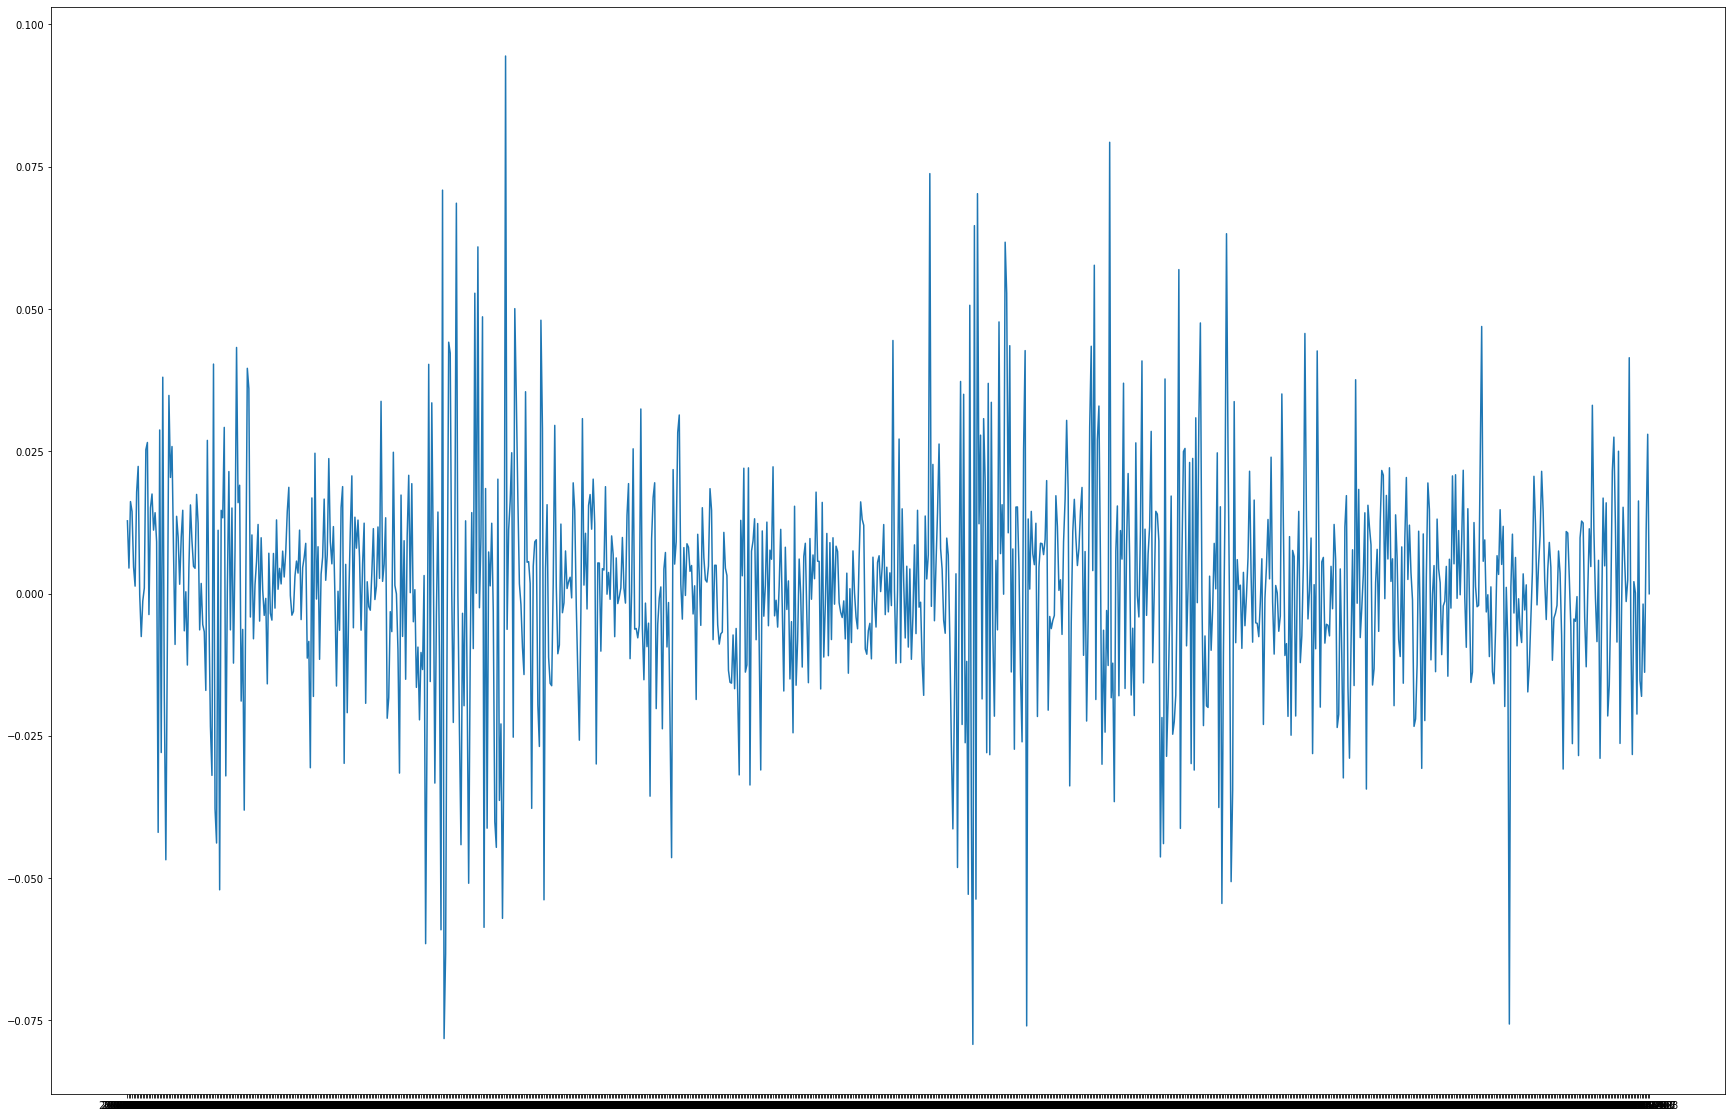

In [11]:
# ESERCIZIO 7

date = dati_azioni[0]
valori = dati_azioni[4]

fig, ax = plt.subplots(figsize=(30,20))
ax.plot(date, valori)
plt.show()

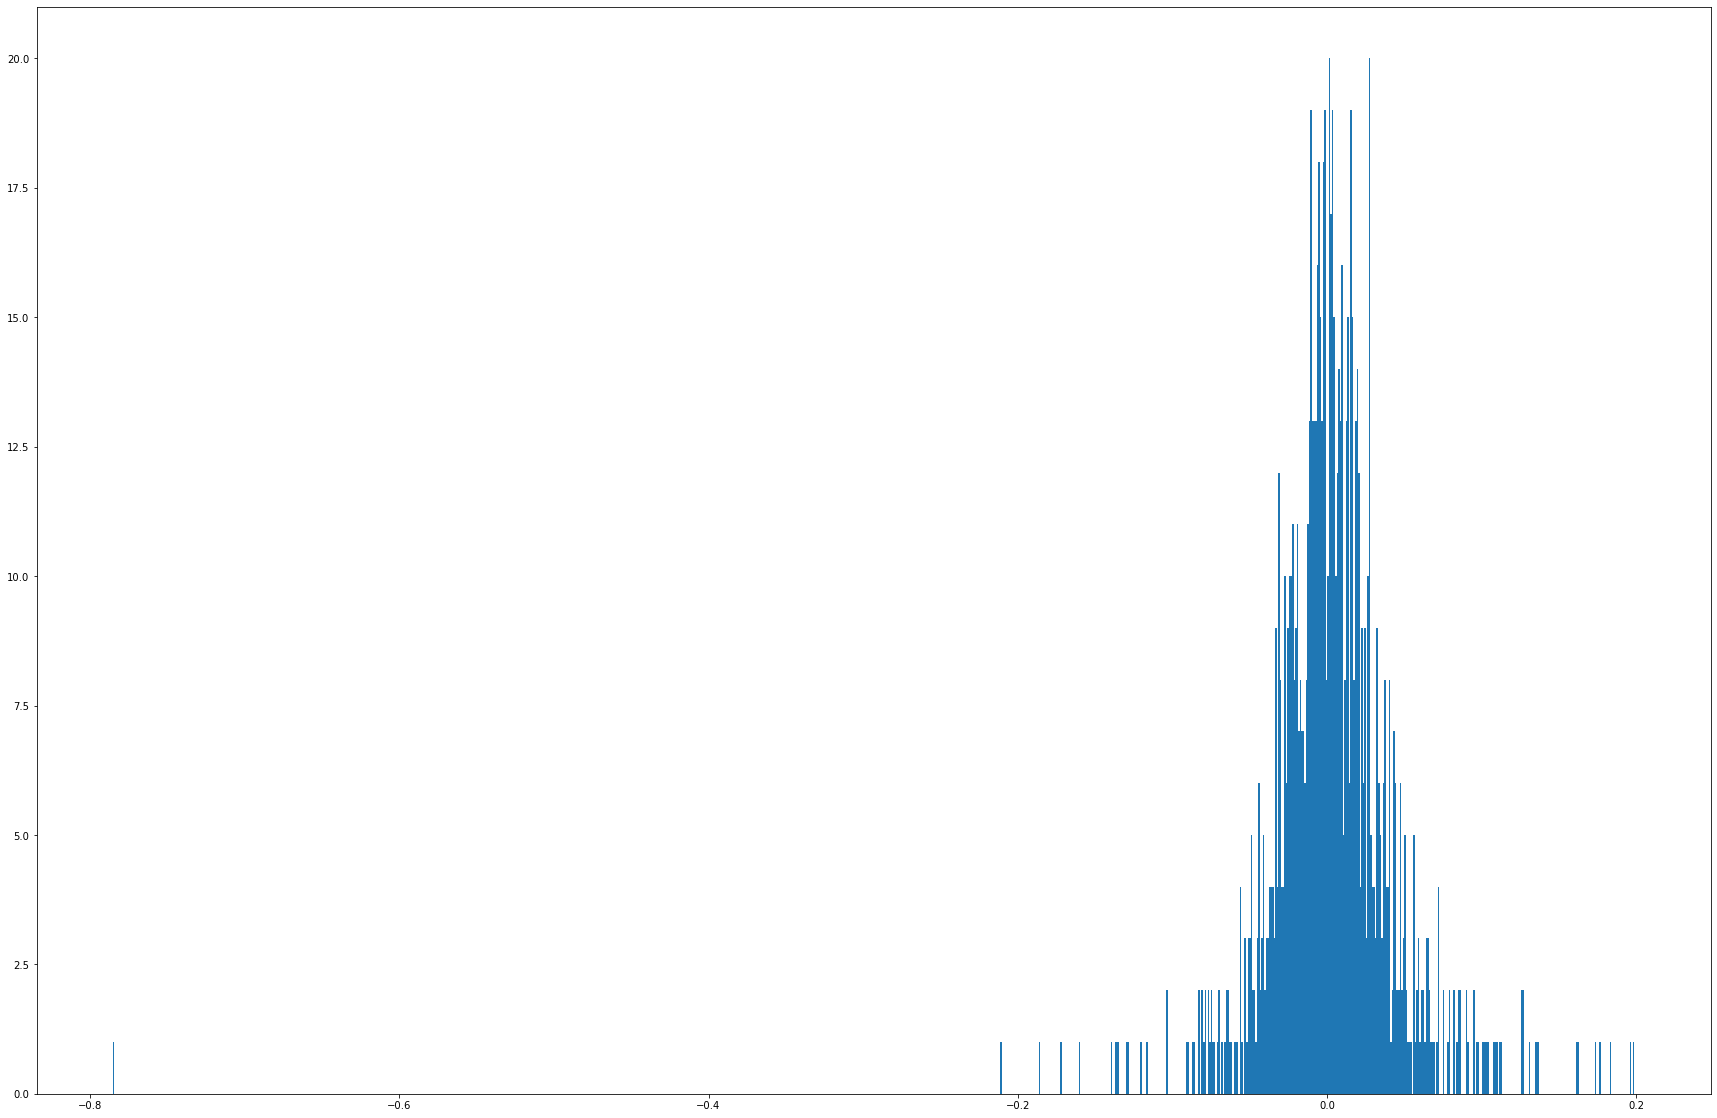

In [12]:
# ESERCIZIO 8

dati = dati_azioni[6]

fig, ax = plt.subplots(figsize=(30,20))
ax.hist(dati, bins=len(dati))
plt.show()

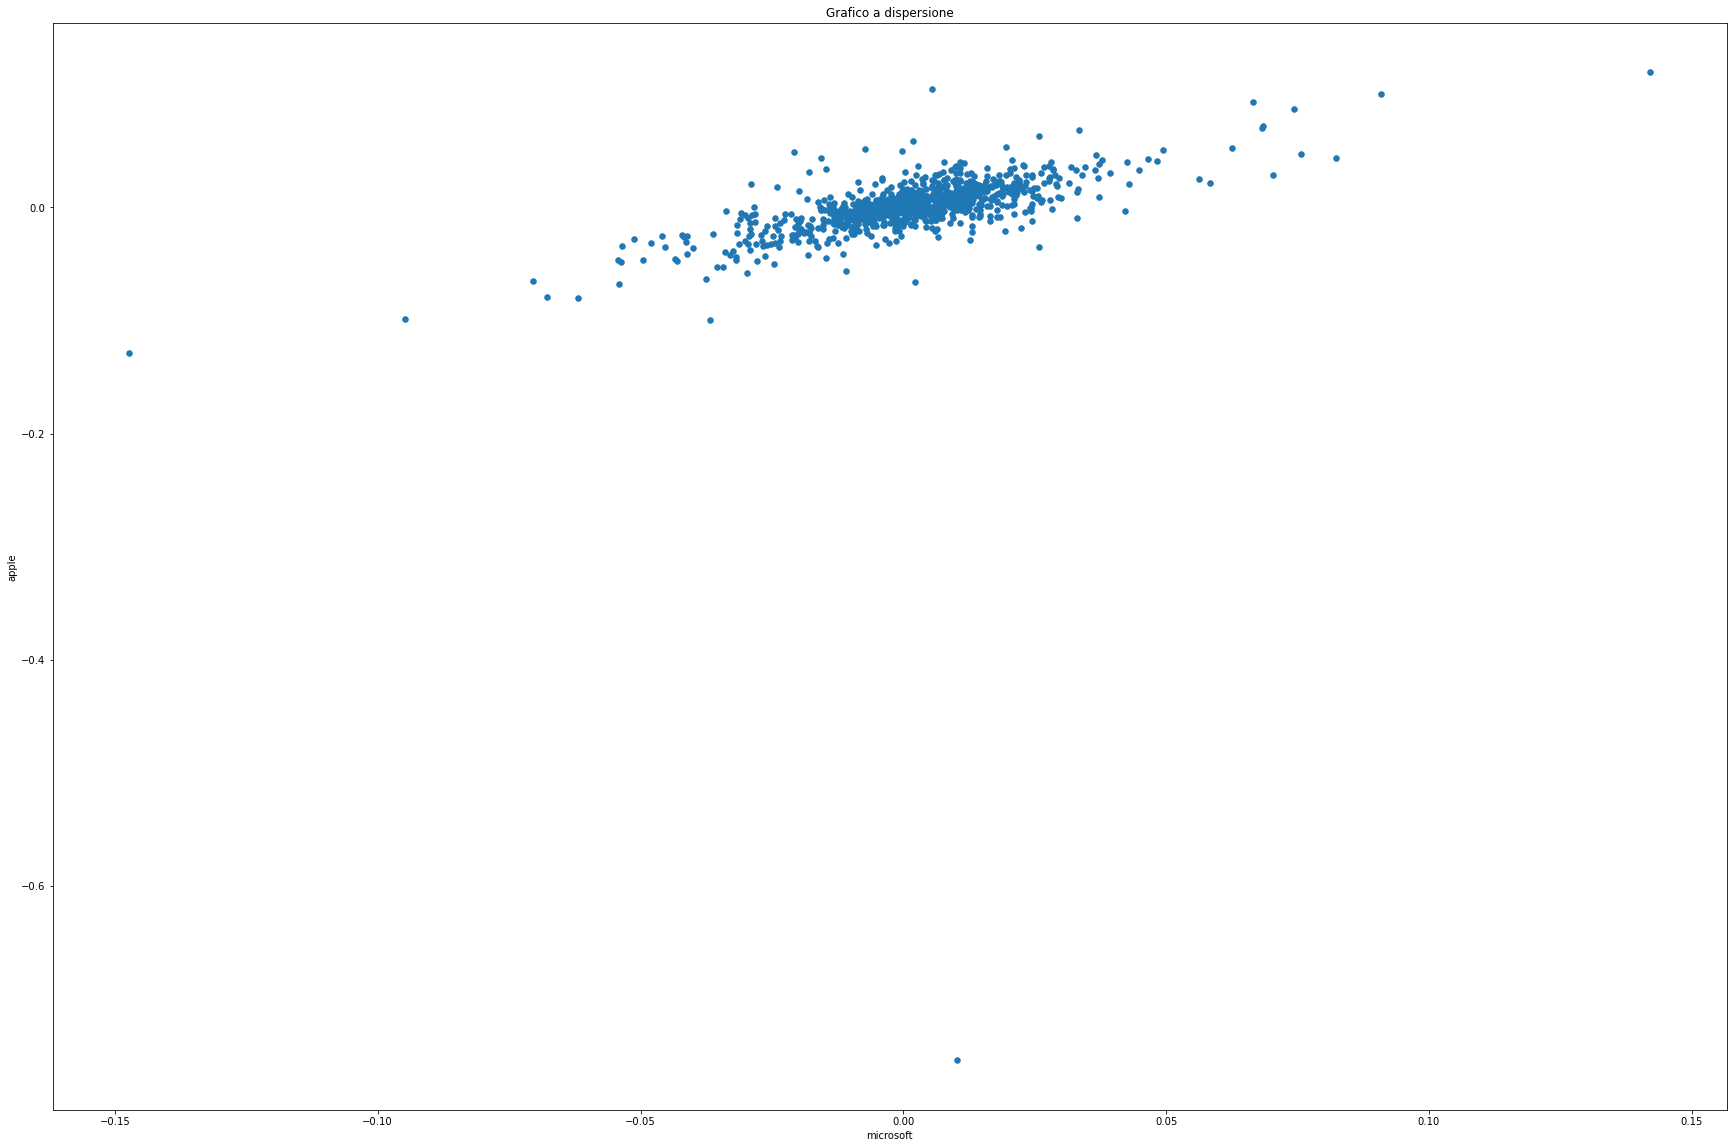

In [17]:
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(dati_azioni[2], dati_azioni[1], s = 30.0) # s=n serve per modifcare la dimensione dei punti
ax.set_title("Grafico a dispersione")
ax.set_xlabel("microsoft")
ax.set_ylabel("apple")
plt.show()